In [81]:
import pandas
import numpy as np 
from sqlalchemy import create_engine

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

import scipy.stats

In [8]:
compas_raw = pandas.read_csv("compas-scores-two-years.csv")

compas_2yr = pandas.read_csv("compas-scores-two-years.csv")

In [32]:
compas_2yr.race.value_counts()

African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64

In [73]:
compas_2yr.event.head()

0    0
1    1
2    0
3    0
4    0
Name: event, dtype: int64

In [10]:
compas_2yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
id                         7214 non-null int64
name                       7214 non-null object
first                      7214 non-null object
last                       7214 non-null object
compas_screening_date      7214 non-null object
sex                        7214 non-null object
dob                        7214 non-null object
age                        7214 non-null int64
age_cat                    7214 non-null object
race                       7214 non-null object
juv_fel_count              7214 non-null int64
decile_score               7214 non-null int64
juv_misd_count             7214 non-null int64
juv_other_count            7214 non-null int64
priors_count               7214 non-null int64
days_b_screening_arrest    6907 non-null float64
c_jail_in                  6907 non-null object
c_jail_out                 6907 non-null object
c_case_number              7192 non

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [33]:
white_data = compas_2yr[compas_2yr.race=='Caucasian']
black_data = compas_2yr[compas_2yr.race=='African-American']

all_roc = roc_curve(compas_2yr.two_year_recid, compas_2yr.decile_score)
white_roc = roc_curve(white_data.two_year_recid, white_data.decile_score)
black_roc = roc_curve(black_data.two_year_recid, black_data.decile_score)

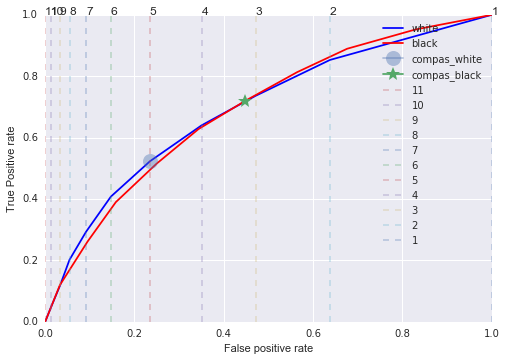

In [78]:
# plt.plot(all_roc[0], all_roc[1], label='all')
plt.plot(white_roc[0], white_roc[1], label='white', color='blue')
plt.plot(black_roc[0], black_roc[1], label='black', color='red')

# plt.plot(.2345, 1-.4772,)


plt.plot(.2345,1-.4772, marker='o', markersize=15, label="compas_white", alpha=.4)

plt.plot(.4487,1-.2799, marker='*', markersize=15, label="compas_black")


# plt.plot([0,1], [1-.4772, 1-.4772], ls='--', color='blue', alpha=.4)
# plt.plot([.2345,.2345], [0,1], ls='--', color='blue',alpha=.4)
# plt.plot([0,1], [1-.2799, 1-.2799], ls='--', color='red',alpha=.4)
# plt.plot([.4485,.4485], [0,1], ls='--', color='red',alpha=.4)

for (fpr, thresh) in zip(white_roc[0], white_roc[2]):
    plt.plot([fpr,fpr],[0,1],label=str(thresh),ls='--',alpha=.3 )
    plt.text(fpr,1,str(thresh))

# for (fpr, thresh) in zip(black_roc[0], black_roc[2]):
#     plt.plot([fpr,fpr],[0,1],label=str(thresh),ls=':',alpha=.3 )
#     plt.text(fpr,0,str(thresh))

plt.xlabel("False positive rate")
plt.ylabel("True Positive rate")
plt.legend()


# Observations

- The above chart shows that a rating of 5 for a white person, in terms of probability of commiting a future crime, is equivalent to a rating of 7 for a black person. So ratings are unfairly harsh for african-americans (at least within this dataset). 

# Running questions

- Why did the article choose to put high & medium in the same class? 

- Can we build a classifier that would "relabel" the scores for people if they were black or white, i.e. take the arrest record for a white person, change their race to african-american and classify the resulting score. Do the same thing for african-americans (change their race to white). Is this the right thing to do? How much less accurate do these classifiers become when we feed them the wrong race data? 

- Is race data actually used in the construction of the compas score? How is it used? 




# The effect of recidivism rate


One nagging issue with the interpretation of the ProPublica analysis is that it doesn't fully address the fact that the recidivism rates are very different. African-Americans in the dataset recidivate at a rate of 51% while whites recidivate at the rate of 39.6%. Should this difference in base rate necessarily affect the false positive and false negative rate? 

In [70]:
compas_2yr.groupby('race')['two_year_recid'].mean()

race
African-American    0.514340
Asian               0.281250
Caucasian           0.393643
Hispanic            0.364207
Native American     0.555556
Other               0.352785
Name: two_year_recid, dtype: float64

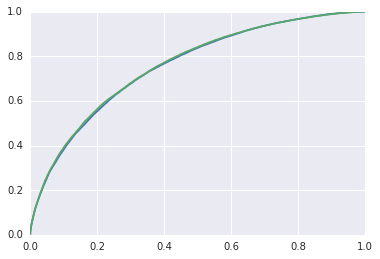

In [87]:
n_points = 100000
y_true = scipy.stats.bernoulli.rvs(.3, size=n_points)
score = y_true + scipy.stats.norm.rvs(0, 1, size=n_points)


np.random.randint(10, size=n_points)

y_true_2 = scipy.stats.bernoulli.rvs(.7, size=n_points)
score_2 = y_true_2 + scipy.stats.norm.rvs(0, 1, size=n_points)



roc = roc_curve(y_true, score)
roc_2 = roc_curve(y_true_2, score_2)
plt.plot(roc[0], roc[1])

plt.plot(roc_2[0], roc_2[1])